In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd 
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species']= iris.target 

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Step 2

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['species'], test_size=0.3, random_state=42)


# Step 3

In [28]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [29]:
# Train the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 4

In [30]:
dt_predictions = dt_clf.predict(X_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))

# Evaluate the Random Forest model
rf_predictions = rf_clf.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0
Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


# Step 5

In [31]:
print("Feature importances for Decision Tree:")
print(dict(zip(iris.feature_names, dt_clf.feature_importances_)))

print("Feature importances for Random Forest:")
print(dict(zip(iris.feature_names, rf_clf.feature_importances_)))

Feature importances for Decision Tree:
{'sepal length (cm)': 0.0, 'sepal width (cm)': 0.01911001911001911, 'petal length (cm)': 0.8932635518001373, 'petal width (cm)': 0.08762642908984374}
Feature importances for Random Forest:
{'sepal length (cm)': 0.1041050070611777, 'sepal width (cm)': 0.04460498814966301, 'petal length (cm)': 0.4173081338019912, 'petal width (cm)': 0.43398187098716823}


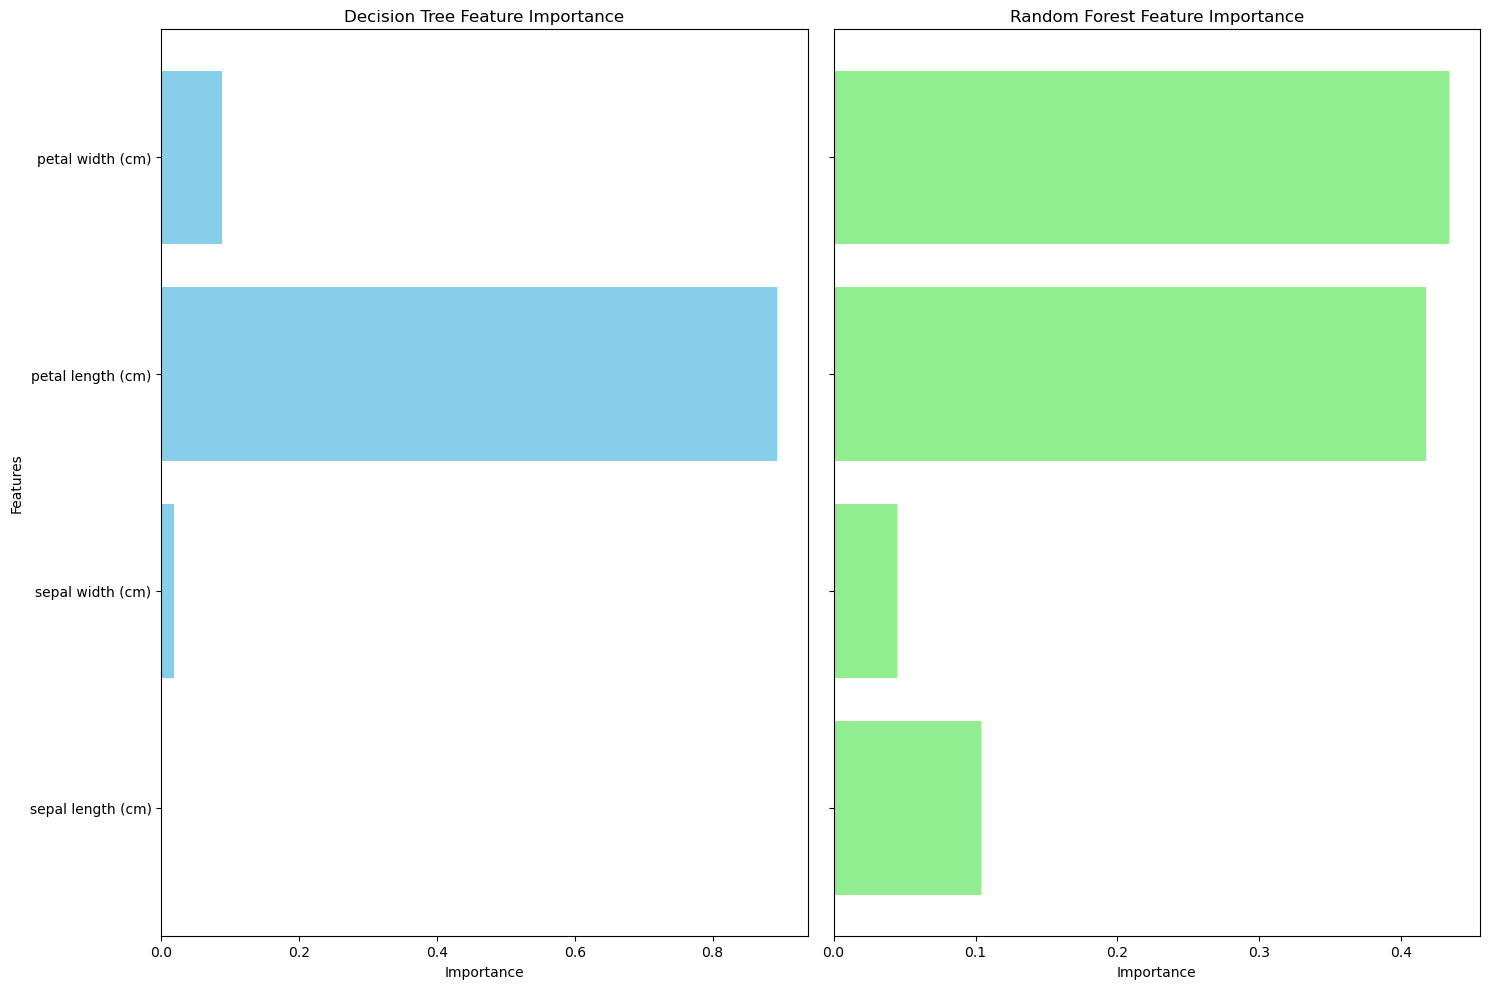

In [33]:
features = iris.feature_names

# Creating the horizontal bar plot again with the corrected 'features' variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)

# Horizontal bar plot for Decision Tree feature importances
axes[0].barh(features, dt_feature_importances, color='skyblue')
axes[0].set_title('Decision Tree Feature Importance')

# Horizontal bar plot for Random Forest feature importances
axes[1].barh(features, rf_feature_importances, color='lightgreen')
axes[1].set_title('Random Forest Feature Importance')

# Set labels
axes[0].set_xlabel('Importance')
axes[1].set_xlabel('Importance')
axes[0].set_ylabel('Features')

plt.tight_layout()
plt.show()